In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # 예제 데이터 생성
# data = {
#     'ConsumerConfidenceIndex': [80, 75, 85, 60, 95, 55, 90, 80],
#     'ManufacturingIndex': [60, 65, 70, 50, 75, 45, 80, 70]
# }

# df = pd.DataFrame(data)

# # 데이터 표준화 (스케일링)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)

# # K-평균 군집화
# kmeans = KMeans(n_clusters=3, random_state=42)
# df['Cluster'] = kmeans.fit_predict(scaled_data)

# # 군집화 결과 시각화
# plt.scatter(df['ConsumerConfidenceIndex'], df['ManufacturingIndex'], c=df['Cluster'], cmap='viridis')
# plt.title('Clustering of Economic Indicators')
# plt.xlabel('Consumer Confidence Index')
# plt.ylabel('Manufacturing Index')
# plt.show()


### 데이터 수집

In [3]:
## 미국 경기선행지수 용어 설명(df)
# 재고순환지표(ism) - ISM/MAN_PMI ; 제조업 구매관리자 지수(Manufacturing Purchasing Managers' Index)
# 경제심리지수(lei) - LEI(Conference Board의 Leading Economic Index) ; 경기를 예측하는 지표로 소비자와 기업의 경제심리를 반영
# S&P 500(sp500)
# 장단기금리차(int) - interest rate spread ; 10년 만기 국채 이자율 - 2년 만기 국채 이자율
# 수출입물가지수(exp, imp) - Export price index, Import price index

In [4]:
# 재고순환지표로 해당하는 미국 미시경제지표(ISM Manufacturing Index) 불러오기 
# 월별데이터
import quandl
import datetime

# Quandl API 키 설정
quandl.ApiConfig.api_key = "dVV9XW8LFRo_XfS-VsgZ"

# 데이터 가져오기
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 1, 1)
ism = quandl.get("ISM/MAN_PMI", start_date=start_date, end_date=end_date)
ism.index = ism.index.to_period('M') # 다른 지표들과 df로 결합하기 위해 periodindex로 변경

display(ism.head())
display(ism.info())
display(ism.describe())

,PMI
Date,
2000-01,56.7
2000-02,55.8
2000-03,54.9
2000-04,54.7
2000-05,53.2


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2000-01 to 2020-01
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PMI     241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


None

,PMI
count,241.000000
mean,52.573444
std,5.103132
min,33.100000
25%,50.200000
50%,52.800000
75%,56.300000
max,61.400000


In [5]:
# 경제심리지수로 해당하는 미국 LEI(Leading Economic Index) 불러오기
# 2000-01-01~2020-01-01(월별)
lei = pd.read_csv('../datasets/US_LEI.csv', index_col=0)
lei.index = pd.to_datetime(lei.index)
lei.index = lei.index.to_period('M') # 다른 지표들과 df로 결합하기 위해 periodindex로 변경

display(lei.head())
display(lei.info())
display(lei.describe())


,USSLIND
DATE,
2000-01,1.61
2000-02,1.48
2000-03,1.88
2000-04,2.13
2000-05,1.85


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2000-01 to 2020-01
Freq: M
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   USSLIND  241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


None

,USSLIND
count,241.000000
mean,1.113112
std,0.807248
min,-2.650000
25%,0.820000
50%,1.390000
75%,1.610000
max,2.130000


In [6]:
lei.tail()

,USSLIND
DATE,
2019-09,1.50
2019-10,1.41
2019-11,1.38
2019-12,1.48
2020-01,1.57


In [7]:
# S&P500 데이터 불러오기
# 2014-01-21~2021-12-31(일별)
sp500=pd.read_csv('../datasets/SP500.csv', index_col=0)
sp500 = sp500.drop(sp500.index[1574:], axis=0) # 다른 지표들과 시기 맞춰주기 위해 2020-01 이후 데이터 drop

display(sp500.head())
display(sp500.info())
display(sp500.describe())

,SP500
DATE,
2014-01-21,1843.80
2014-01-22,1844.86
2014-01-23,1828.46
2014-01-24,1790.29
2014-01-27,1781.56


<class 'pandas.core.frame.DataFrame'>
Index: 1574 entries, 2014-01-21 to 2020-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SP500   1574 non-null   object
dtypes: object(1)
memory usage: 24.6+ KB


None

,SP500
count,1574
unique,1508
top,.
freq,55


In [8]:
# interest rate spread 데이터 불러오기
# 2000-01-03~2020-01-31(일별)
int =pd.read_csv('../datasets/interest_rate_spread.csv', index_col=0)

display(int.head())
display(int.info())
display(int.describe())

,T10Y2Y
DATE,
2000-01-03,0.20
2000-01-04,0.19
2000-01-05,0.24
2000-01-06,0.22
2000-01-07,0.21


<class 'pandas.core.frame.DataFrame'>
Index: 5240 entries, 2000-01-03 to 2020-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T10Y2Y  5240 non-null   object
dtypes: object(1)
memory usage: 81.9+ KB


None

,T10Y2Y
count,5240
unique,350
top,.
freq,217


In [9]:
int.iloc[4978]

T10Y2Y    0.18
Name: 2019-01-31, dtype: object

In [10]:
# 수출물가지수(Export_price_index)데이터 불러오기
# 2000-01-01~2023-12-01(월별)
exp =pd.read_csv('../datasets/Export_price_index.csv', index_col=0)
exp = exp.drop(exp.index[241:], axis=0) # 다른 지표들과 시기 맞춰주기 위해 2020-01-01 이후 데이터 drop
exp.index = pd.to_datetime(exp.index)
exp.index = exp.index.to_period('M') # 다른 지표들과 df로 결합하기 위해 periodindex로 변경

display(exp.head())
display(exp.info())
display(exp.describe())

,IQ
DATE,
2000-01,99.2
2000-02,99.6
2000-03,100.0
2000-04,100.0
2000-05,100.2


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2000-01 to 2020-01
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IQ      241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


None

,IQ
count,241.000000
mean,117.491286
std,12.219583
min,97.300000
25%,105.600000
50%,120.700000
75%,126.700000
max,135.300000


In [11]:
# 수입물가지수(Import_price_index)데이터 불러오기
# 2000-01-01~2023-12-01(월별)
imp =pd.read_csv('../datasets/Import_price_index.csv', index_col=0)
imp = imp.drop(imp.index[241:], axis=0) # 다른 지표들과 시기 맞춰주기 위해 2020-01-01 이후 데이터 drop
imp.index = pd.to_datetime(imp.index)
imp.index = imp.index.to_period('M') # 다른 지표들과 df로 결합하기 위해 periodindex로 변경

display(imp.head())
display(imp.info())
display(imp.describe())

,IR
DATE,
2000-01,97.8
2000-02,99.7
2000-03,99.9
2000-04,98.5
2000-05,98.8


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2000-01 to 2020-01
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IR      241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


None

,IR
count,241.000000
mean,119.694191
std,15.352493
min,91.400000
25%,105.500000
50%,122.200000
75%,128.300000
max,147.500000


### 데이터 전처리
- 데이터 결측치 처리(전일과 다음일 평균치로 대체)
- 일별 데이터 월별 데이터로 변경
- index type 통일하기

In [12]:
# 스케일링 하기 전 일별데이터들 월별데이터로 변경 -> S&P500(sp500)과 interest rate spread(int)

In [13]:
# SP500지수는 2014년 이후부터 존재 그 전은 0으로 대치
# 일별 데이터를 월별 데이터로 변경 (월별 평균값을 계산)

sp500.index = pd.to_datetime(sp500.index) # 인덱스를 detetimeindex로 변경
sp500['SP500'] = pd.to_numeric(sp500['SP500'], errors='coerce')# 데이터타입을 float형태로 변경

# 결측치 처리 - 전 날과 다음 날의 평균 데이터로 대체
sp500['SP500'] = sp500['SP500'].fillna((sp500['SP500'].shift(1) + sp500['SP500'].shift(-1)) / 2)
sp500.isna().sum()

SP500    0
dtype: int64

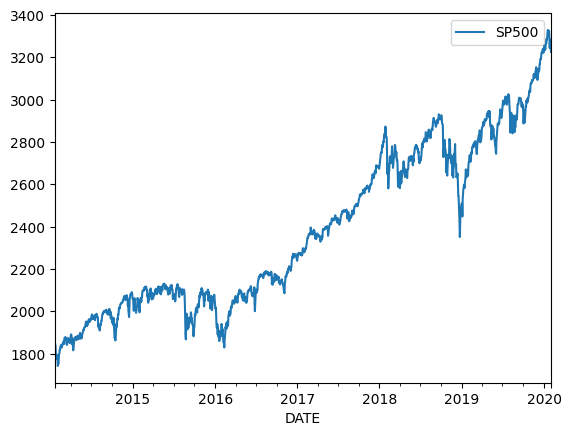

In [14]:
# 추세 확인하기 위해 그래프 시각화
sp500.plot()
plt.show()

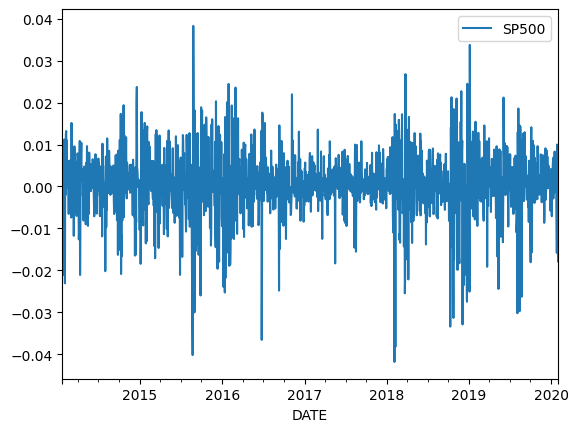

In [15]:
# 추세성 제거
# 로그 변환
sp500['SP500'] = np.log(sp500['SP500'])

# 1차 차분
sp500['SP500'] = sp500['SP500'].diff()

# # 계절성 차분
# sp500['SP500'] = sp500['SP500'].diff(12) 

sp500.plot()
plt.show()

In [16]:
sp500_monthly = sp500.resample('M').mean()
sp500_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2014-01-31 to 2020-01-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   73 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [17]:
sp500_monthly.index = sp500_monthly.index.to_period('M') # 다른 지표들과 df로 결합하기 위해 periodindex로 변경
sp500_monthly.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 73 entries, 2014-01 to 2020-01
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   73 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [18]:
sp500_monthly.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 73 entries, 2014-01 to 2020-01
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   73 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [19]:
# interest rate spread
# 일별데이터를 월별데이터로 변경

int.index = pd.to_datetime(int.index) # 인덱스를 detetimeindex로 변경
int['T10Y2Y'] = pd.to_numeric(int['T10Y2Y'], errors='coerce')# 데이터타입을 float형태로 변경

# 결측치 처리 - 전 날과 다음 날의 평균 데이터로 대체
int['T10Y2Y'] = int['T10Y2Y'].fillna((int['T10Y2Y'].shift(1) + int['T10Y2Y'].shift(-1)) / 2)
int.isna().sum()


T10Y2Y    2
dtype: int64

In [20]:
int[int['T10Y2Y'].isna() == True]

,T10Y2Y
DATE,
2001-09-11,NaN
2001-09-12,NaN


In [21]:
# 2001-09-11, 2001-09-12 양일 결측치 10일과 13일의 평균값으로 대체
value = (int.iloc[440] + int.iloc[443]) / 2

int['T10Y2Y'].iloc[441] = value
int['T10Y2Y'].iloc[442] = value
int.isna().sum()

T10Y2Y    0
dtype: int64

In [22]:
int_monthly = int.resample('M').mean()
int_monthly

,T10Y2Y
DATE,
2000-01-31,0.223095
2000-02-29,-0.095714
2000-03-31,-0.271739
2000-04-30,-0.411250
2000-05-31,-0.368696
...,...
2019-09-30,0.049048
2019-10-31,0.155000
2019-11-30,0.200238


In [23]:
int_monthly.index = int_monthly.index.to_period('M') # 다른 지표들과 df로 결합하기 위해 periodindex로 변경
int_monthly.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2000-01 to 2020-01
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T10Y2Y  241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [24]:
# 재고순환지표(ism)
# 경제심리지수(lei)
# S&P 500(sp500)
# 장단기금리차(int)
# 수출입물가지수(exp, imp)
# --> 각각의 데이터프레임을 Date기준으로 df 결합

In [25]:
# 하나의 데이터프레임으로 결합
df = pd.concat([ism, lei, sp500_monthly, int_monthly, exp, imp], axis=1)
df

,PMI,USSLIND,SP500,T10Y2Y,IQ,IR
2000-01,56.7,1.61,NaN,0.223095,99.2,97.8
2000-02,55.8,1.48,NaN,-0.095714,99.6,99.7
2000-03,54.9,1.88,NaN,-0.271739,100.0,99.9
2000-04,54.7,2.13,NaN,-0.411250,100.0,98.5
2000-05,53.2,1.85,NaN,-0.368696,100.2,98.8
...,...,...,...,...,...,...
2019-09,48.2,1.50,0.000811,0.049048,125.1,125.0
2019-10,48.5,1.41,0.000879,0.155000,125.1,124.5
2019-11,48.1,1.38,0.001594,0.200238,125.2,124.7
2019-12,47.8,1.48,0.001281,0.250455,125.0,125.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2000-01 to 2020-01
Freq: M
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PMI      241 non-null    float64
 1   USSLIND  241 non-null    float64
 2   SP500    73 non-null     float64
 3   T10Y2Y   241 non-null    float64
 4   IQ       241 non-null    float64
 5   IR       241 non-null    float64
dtypes: float64(6)
memory usage: 13.2 KB


In [27]:
# SP500 2014년 이전의 값은 0으로 대체
df['SP500'].fillna(0, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2000-01 to 2020-01
Freq: M
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PMI      241 non-null    float64
 1   USSLIND  241 non-null    float64
 2   SP500    241 non-null    float64
 3   T10Y2Y   241 non-null    float64
 4   IQ       241 non-null    float64
 5   IR       241 non-null    float64
dtypes: float64(6)
memory usage: 13.2 KB


In [29]:
df

,PMI,USSLIND,SP500,T10Y2Y,IQ,IR
2000-01,56.7,1.61,0.000000,0.223095,99.2,97.8
2000-02,55.8,1.48,0.000000,-0.095714,99.6,99.7
2000-03,54.9,1.88,0.000000,-0.271739,100.0,99.9
2000-04,54.7,2.13,0.000000,-0.411250,100.0,98.5
2000-05,53.2,1.85,0.000000,-0.368696,100.2,98.8
...,...,...,...,...,...,...
2019-09,48.2,1.50,0.000811,0.049048,125.1,125.0
2019-10,48.5,1.41,0.000879,0.155000,125.1,124.5
2019-11,48.1,1.38,0.001594,0.200238,125.2,124.7
2019-12,47.8,1.48,0.001281,0.250455,125.0,125.0


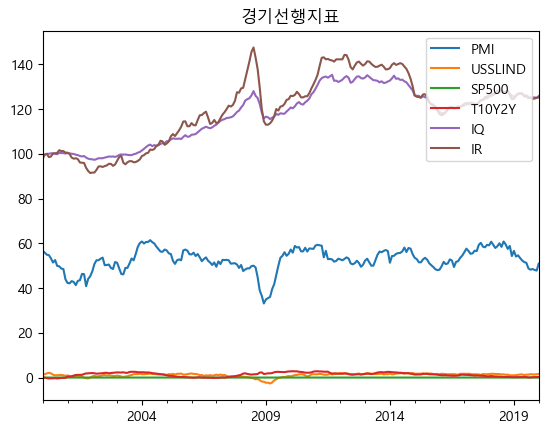

In [30]:
# 데이터프레임 시각화

plt.rc("font", family="Malgun Gothic")

df.plot()
plt.title("경기선행지표")
plt.legend(loc='upper right')
plt.show()

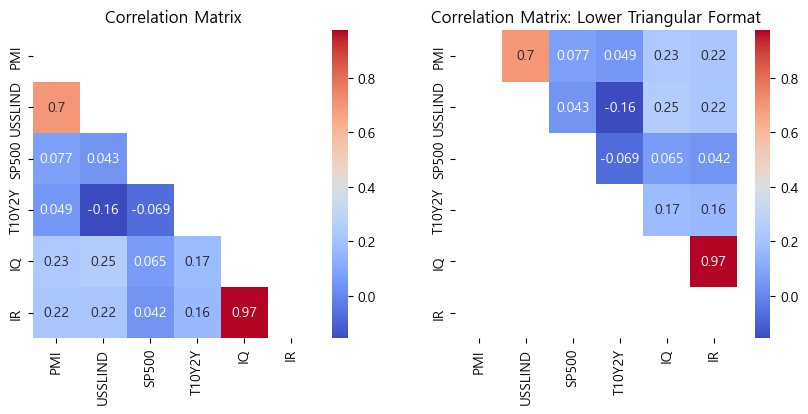

In [31]:
# feature간 상관도 확인
# 데이터프레임(df)에 상관 행렬을 계산하고 상삼각행렬(upper triangular)과 하삼각행렬(lower triangular) 생성
ut = np.triu(df.corr())
lt = np.tril(df.corr())

# 색상맵(colors) 정의
colors = sns.color_palette("coolwarm", as_cmap=True)

# 그림 크기 설정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 상관 행렬의 상삼각행렬 시각화
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), cmap=colors, annot=True, cbar=True, mask=ut)
plt.title('Correlation Matrix')

# 상관 행렬의 하삼각행렬 시각화
plt.subplot(1, 2, 2)
sns.heatmap(df.corr(), cmap=colors, annot=True, cbar=True, mask=lt)
plt.title('Correlation Matrix: Lower Triangular Format')

# 그래프 표시
plt.show()

In [32]:
# 수출입물가지수 상관성 0.97
# 어떻게 처리해야할지?

### 데이터 스케일링
- 서로 다른 변수의 단위를 통일시켜 모델이 각 변수에 대해 공정하게 학습하도록 도와주는 중요한 전처리 단계
    - 스케일링은 항상 학습 데이터에만 적용한 후, 검증 데이터나 테스트 데이터에도 동일한 변환을 적용해야 함
    - 스케일링은 군집화 모델이나 예측 모델을 학습하기 전에 적용되어야 함
    - 어떤 스케일링 방법을 선택할지는 데이터의 특성과 모델에 따라 달라질 수 있음. 실험을 통해 어떤 방법이 성능을 높이는지 확인해야 함

In [33]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터셋 변환(데이터 표준화)
stand_scaled = scaler.fit_transform(df)

# transform()시 scale 변환된 데이터셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
stand_df = pd.DataFrame(data=stand_scaled, columns=df.columns)
print('feature들의 평균값')
print(stand_df.mean())
print('\nfeature들의 분산값')
print(stand_df.var())


feature들의 평균값
PMI        1.061392e-15
USSLIND    1.474155e-16
SP500     -1.474155e-17
T10Y2Y     5.896620e-17
IQ        -1.002425e-15
IR         4.717296e-16
dtype: float64

feature들의 분산값
PMI        1.004167
USSLIND    1.004167
SP500      1.004167
T10Y2Y     1.004167
IQ         1.004167
IR         1.004167
dtype: float64


In [34]:
stand_df

,PMI,USSLIND,SP500,T10Y2Y,IQ,IR
0,0.810315,0.616814,-0.110315,-1.192517,-1.499998,-1.429068
1,0.633586,0.455438,-0.110315,-1.542529,-1.467196,-1.305052
2,0.456856,0.951980,-0.110315,-1.735782,-1.434393,-1.291998
3,0.417583,1.262319,-0.110315,-1.888947,-1.434393,-1.383378
4,0.123034,0.914740,-0.110315,-1.842228,-1.417992,-1.363796
...,...,...,...,...,...,...
236,-0.858795,0.480265,0.808135,-1.383599,0.623961,0.346318
237,-0.799886,0.368543,0.885331,-1.267276,0.623961,0.313683
238,-0.878432,0.331303,1.694766,-1.217611,0.632162,0.326737
239,-0.937342,0.455438,1.340392,-1.162479,0.615761,0.346318


In [35]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터셋 변환(데이터 정규화)
normal_scaled = scaler.fit_transform(df)

# transform()시 scale 변환된 데이터셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
normal_df = pd.DataFrame(data=normal_scaled, columns=df.columns)
print('feature들의 평균값')
print(normal_df.mean())
print('\nfeature들의 분산값')
print(normal_df.var())


feature들의 평균값
PMI        0.688108
USSLIND    0.787262
SP500      0.570381
T10Y2Y     0.530053
IQ         0.531350
IR         0.504353
dtype: float64

feature들의 분산값
PMI        0.032516
USSLIND    0.028521
SP500      0.011628
T10Y2Y     0.079069
IQ         0.103406
IR         0.074891
dtype: float64


In [36]:
normal_df

,PMI,USSLIND,SP500,T10Y2Y,IQ,IR
0,0.833922,0.891213,0.558510,0.195424,0.050000,0.114082
1,0.802120,0.864017,0.558510,0.097208,0.060526,0.147950
2,0.770318,0.947699,0.558510,0.042979,0.071053,0.151515
3,0.763251,1.000000,0.558510,0.000000,0.071053,0.126560
4,0.710247,0.941423,0.558510,0.013110,0.076316,0.131907
...,...,...,...,...,...,...
236,0.533569,0.868201,0.657344,0.141805,0.731579,0.598930
237,0.544170,0.849372,0.665651,0.174445,0.731579,0.590018
238,0.530035,0.843096,0.752755,0.188382,0.734211,0.593583
239,0.519435,0.864017,0.714621,0.203852,0.728947,0.598930


In [37]:
from sklearn.preprocessing import RobustScaler

# RobustScaler 객체 생성
scaler = RobustScaler()

# RobustScaler로 데이터셋 변환
robus_scaled = scaler.fit_transform(df)

# transform()시 scale 변환된 데이터셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
robus_df = pd.DataFrame(data=robus_scaled, columns=df.columns)
print('feature 중앙값은')
print(scaler.center_)
print('\nfeature 최대값')
print(scaler.scale_)

feature 중앙값은
[ 52.8          1.39         0.           1.43204545 120.7
 122.2       ]

feature 최대값
[ 6.1         0.79        1.          1.66864286 21.1        22.8       ]


In [38]:
robus_df

,PMI,USSLIND,SP500,T10Y2Y,IQ,IR
0,0.639344,0.278481,0.000000,-0.724511,-1.018957,-1.070175
1,0.491803,0.113924,0.000000,-0.915570,-1.000000,-0.986842
2,0.344262,0.620253,0.000000,-1.021060,-0.981043,-0.978070
3,0.311475,0.936709,0.000000,-1.104667,-0.981043,-1.039474
4,0.065574,0.582278,0.000000,-1.079165,-0.971564,-1.026316
...,...,...,...,...,...,...
236,-0.754098,0.139241,0.000811,-0.828816,0.208531,0.122807
237,-0.704918,0.025316,0.000879,-0.765320,0.208531,0.100877
238,-0.770492,-0.012658,0.001594,-0.738209,0.213270,0.109649
239,-0.819672,0.113924,0.001281,-0.708115,0.203791,0.122807


### 군집화

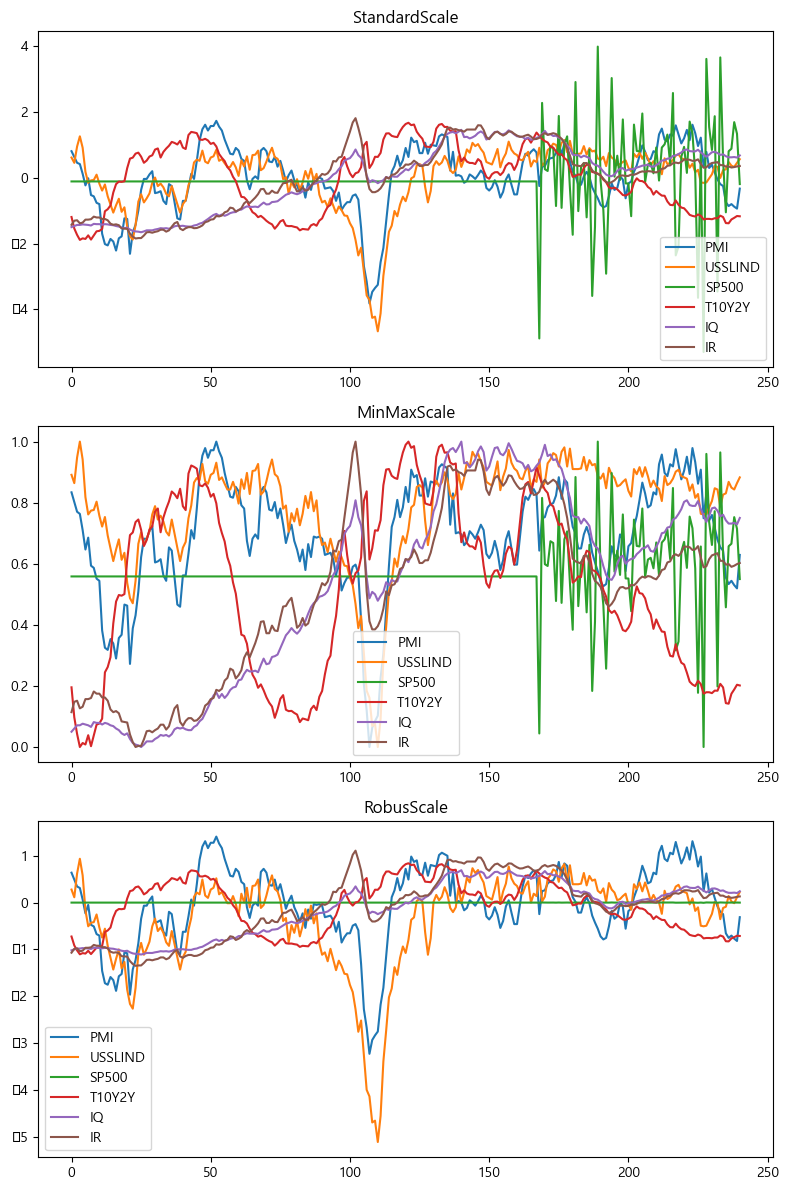

In [39]:
# scaled data 시각화
import matplotlib.pyplot as plt

# 서브플롯 설정 및 그래프 그리기
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# 각 데이터프레임을 반복하며 그래프 그리기
for idx, (df, title) in enumerate([(stand_df, 'StandardScale'), (normal_df, 'MinMaxScale'), (robus_df, 'RobusScale')]):
    plt.subplot(3, 1, idx + 1)            
    df.plot(ax=plt.gca())
    plt.title(title)

# 전체 그림의 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


#### K_Means

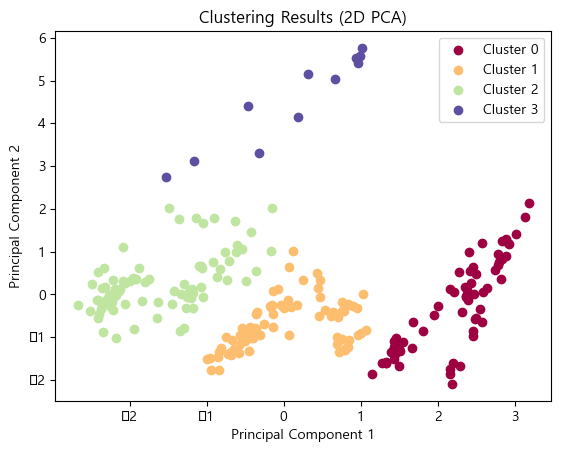

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 군집화할 클러스터 개수 설정
n_clusters = 4

# KMeans 모델 초기화
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# 모델 학습 및 예측
stand_df['cluster'] = kmeans.fit_predict(stand_df)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
stand_df_pca = pca.fit_transform(stand_df)

# 차원 축소된 데이터프레임에 클러스터 정보 추가
stand_df_pca = pd.DataFrame(stand_df_pca, columns=['PC1', 'PC2'])
stand_df_pca['cluster'] = stand_df['cluster']

# 각 클러스터를 다른 색으로 표시
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
for cluster, color in zip(range(n_clusters), colors):
    cluster_points = stand_df_pca[stand_df_pca['cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], color=color, label=f'Cluster {cluster}')

# 시각화 설정
plt.title('Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [41]:
# 실루엣 계수로 군집화 평가
from sklearn.metrics import silhouette_samples, silhouette_score

# 개별 데이터 실루엣 계수
score_samples = silhouette_samples(stand_df, stand_df.cluster)
print(f'silhouette_samples( ) return 값의 shape: {score_samples.shape}')

# 데이터 프레임에 실루엣 계수 추가
stand_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수
average_score = silhouette_score(stand_df, stand_df.cluster)
print(f'Silhouette Analysis Score: {average_score:.3f}')

silhouette_samples( ) return 값의 shape: (241,)
Silhouette Analysis Score: 0.337


In [42]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

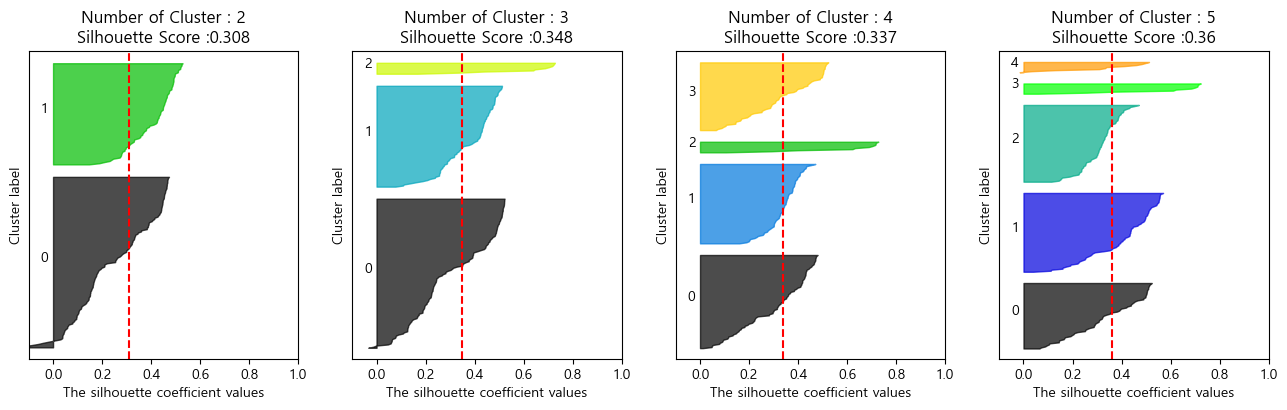

In [43]:
# 군집 개수 최적화
visualize_silhouette([2, 3, 4, 5 ], stand_df)

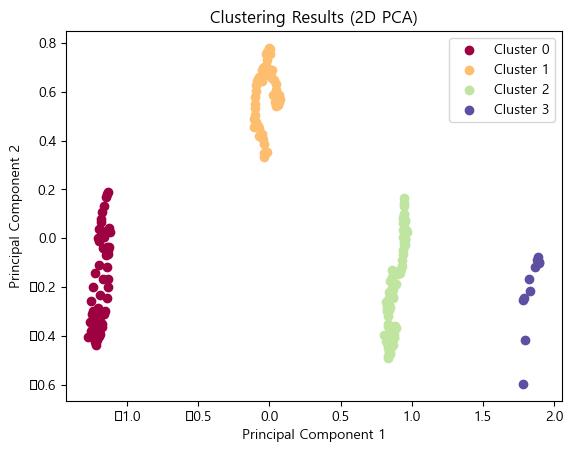

In [44]:
# 군집화할 클러스터 개수 설정
n_clusters = 4

# KMeans 모델 초기화
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# 모델 학습 및 예측
normal_df['cluster'] = kmeans.fit_predict(normal_df)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
normal_df_pca = pca.fit_transform(normal_df)

# 차원 축소된 데이터프레임에 클러스터 정보 추가
normal_df_pca = pd.DataFrame(normal_df_pca, columns=['PC1', 'PC2'])
normal_df_pca['cluster'] = normal_df['cluster']

# 각 클러스터를 다른 색으로 표시
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
for cluster, color in zip(range(n_clusters), colors):
    cluster_points = normal_df_pca[normal_df_pca['cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], color=color, label=f'Cluster {cluster}')

# 시각화 설정
plt.title('Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

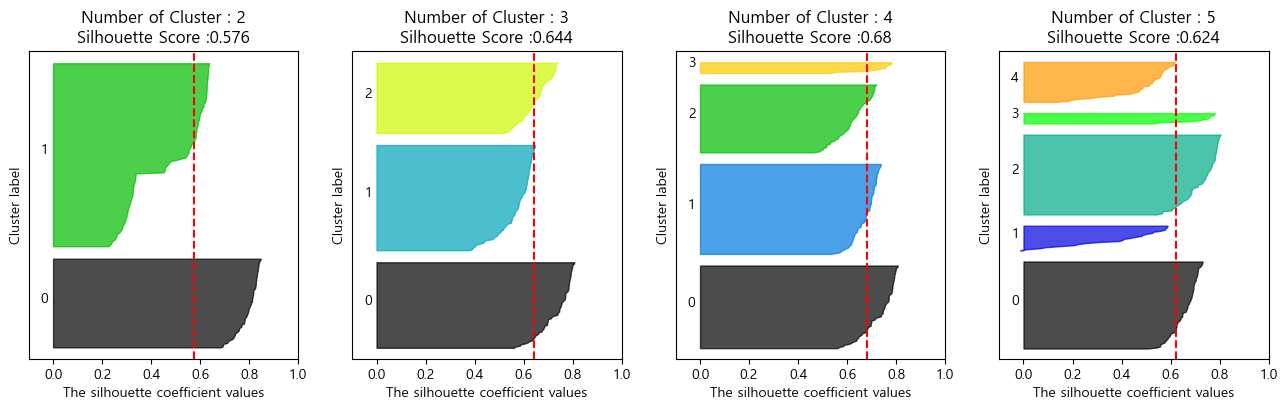

In [45]:
# 군집 개수 최적화
visualize_silhouette([2, 3, 4, 5 ], normal_df)

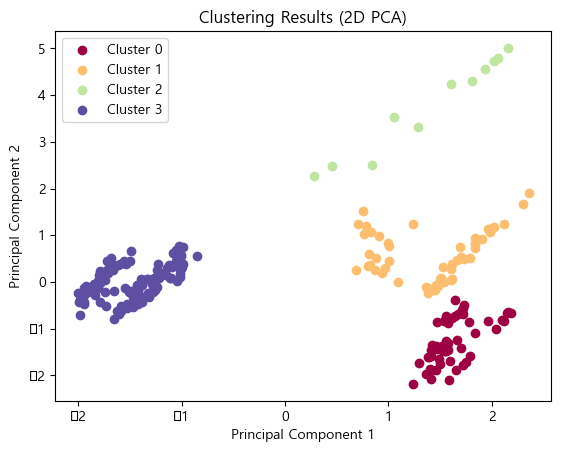

In [46]:
# 군집화할 클러스터 개수 설정
n_clusters = 4

# KMeans 모델 초기화
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# 모델 학습 및 예측
robus_df['cluster'] = kmeans.fit_predict(robus_df)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
robus_df_pca = pca.fit_transform(robus_df)

# 차원 축소된 데이터프레임에 클러스터 정보 추가
robus_df_pca = pd.DataFrame(robus_df_pca, columns=['PC1', 'PC2'])
robus_df_pca['cluster'] = robus_df['cluster']

# 각 클러스터를 다른 색으로 표시
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
for cluster, color in zip(range(n_clusters), colors):
    cluster_points = robus_df_pca[robus_df_pca['cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], color=color, label=f'Cluster {cluster}')

# 시각화 설정
plt.title('Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

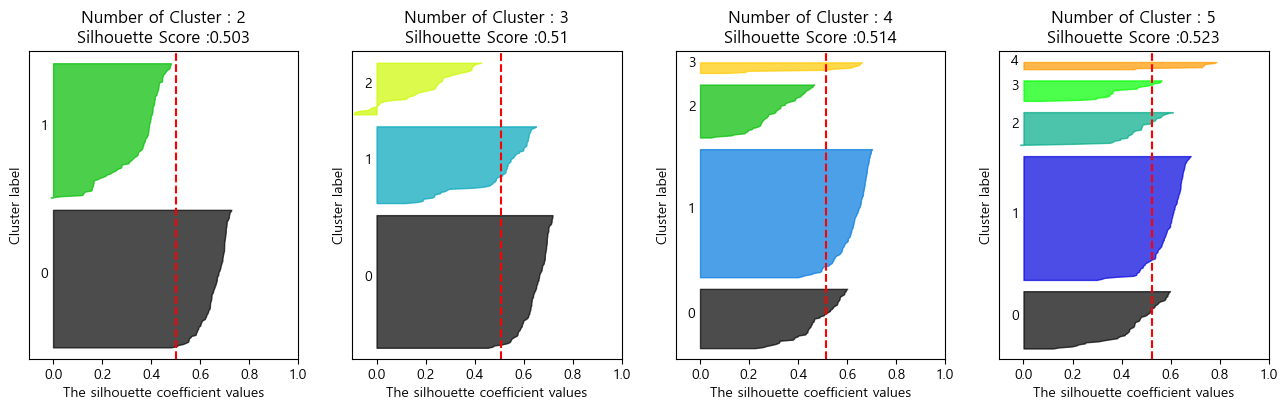

In [47]:
# 군집 개수 최적화
visualize_silhouette([2, 3, 4, 5 ], robus_df)

#### DBSCAN

In [49]:
# stand_df dbscan
from sklearn.cluster import DBSCAN 

# epsilon 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=2)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(stand_df)
stand_df['cluster'] = model.fit_predict(stand_df)

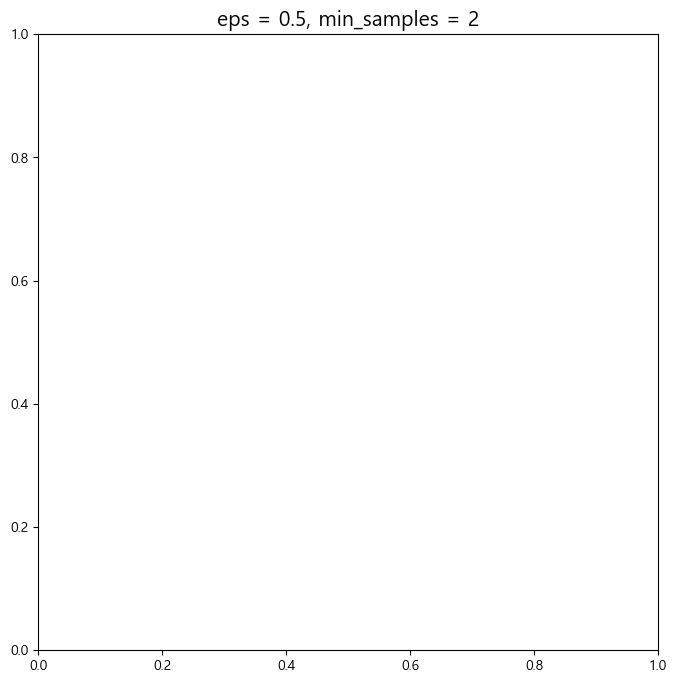

In [53]:
# 클러스터링 결과 시각화
plt.figure(figsize=(8,8))
stand_df.plot
plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.show()